In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Business Objective

Objective

The objective of this project is to build a predictive model that forecasts the demand for shared bikes in the American market, based on several influential factors. BoomBikes, a leading bike-sharing provider, has faced significant challenges due to the ongoing pandemic and aims to use data to understand and adapt to changing customer needs. By analyzing historical bike usage data, the company seeks to identify key variables—such as weather, temperature, day of the week, and season—that impact bike demand.

Using linear regression, this project will explore how these factors affect demand and help predict future trends. The goal is to understand which variables are most significant in explaining fluctuations in bike usage and how they interact. This will allow BoomBikes to optimize operations, adjust fleet distribution, pricing strategies, and better align marketing efforts with expected demand.

In summary, the project aims to provide BoomBikes with a data-driven approach to predict bike demand, enabling them to make informed decisions and respond effectively to market conditions. By understanding demand dynamics, BoomBikes can improve customer satisfaction, maximize efficiency, and strengthen its position in the competitive bike-sharing market as the economy recovers.

# Data Loading

Loading the Data

Loading the data which contains information regarding the Bike Sharing events in the years 2018 and 2019.

In [5]:
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
df.shape

(730, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Data Handling

> Checking and handling missing values

> Checking duplicates

> Checking columns and their datatypes

Checking and handling missing values

In [8]:
df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


There are no missing values in the dataset.

Checking duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(730, 16)

There are no duplicate values in dataset.

Checking columns and their data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


It appears like there are some categorical columns having int/float datatypes.

In [12]:
df[['instant','dteday','season','yr','mnth','holiday','weekday','workingday','weathersit','casual','registered','cnt']].head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,41,1280,1321


Removing redundant columns -

1. instant : It is just the record number so it can be removed as it does not carry specific information.

2. dteday : Since we already have the yr, mnth, weekdays we do not need this date column.

3. casual , registered : our objective is to find the total count of bikes rented which is the 'cnt' column and not any specific category , so we can remove the 2 columns.

In [13]:
df.drop(columns=['instant','dteday','casual','registered'],inplace=True)
df.shape

(730, 12)

Column 'cnt' is our target variable.

Checking frequencies of different categorical columns.

In [14]:
for column in ['season','weathersit','weekday','mnth','yr']:
  print(df[column].value_counts())
  print("--"*50)

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
yr
0    365
1    365
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Converting categorical columns that had numerical datatype into meaningful category names.

In [15]:
df['season']=df['season'].apply({1:'spring',2:'summer',3:'fall',4:'winter'}.get)
df['weathersit']=df['weathersit'].apply({1:'clear/partly-cloudy',2:'misty/cloudy',3:'snow/rain/thunderstorm',4:'heavy_snow/rain/thunderstorm'}.get)
df['weekday']=df['weekday'].apply({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}.get)
df['mnth'] = df['mnth'].apply({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}.get)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


# Exploratory Data Analysis

In [ ]:
num_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()
binary_num_columns=['yr','holiday','workingday']
num_columns=[numcol for numcol in num_columns if numcol not in binary_num_columns]
print(num_columns)
print(binary_num_columns)

['temp', 'atemp', 'hum', 'windspeed', 'cnt']
['yr', 'holiday', 'workingday']


Visualizing Numerical Variables

Visualizing pairplots for the numerical variables 'temp', 'atemp', 'hum', 'windspeed', 'cnt' to understand their nature and explore if any relation exists among them.

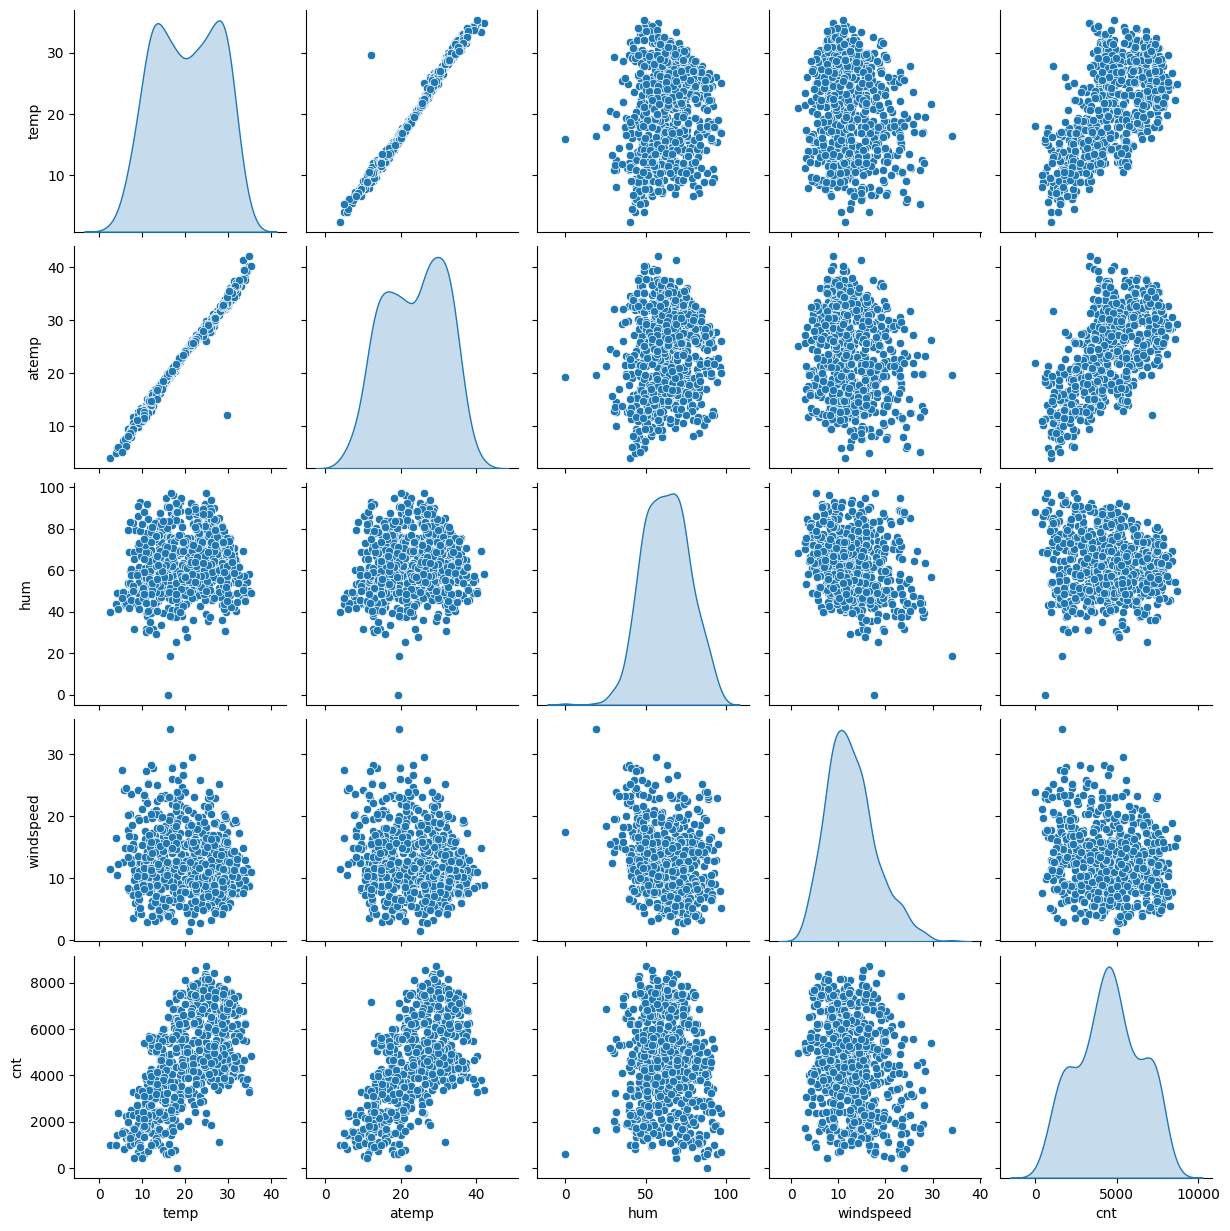

In [ ]:
sns.pairplot(df[num_columns],diag_kind='kde')
plt.show()

Insights

- cnt, temp, atemp have linear relationship with each other.
- temp and atemp not only have linear relation with target variable cnt but they also have linear relationship with each other.

Visualizing Categorical Variables

Visualizing barplots for 'yr', 'holiday', 'workingday'.

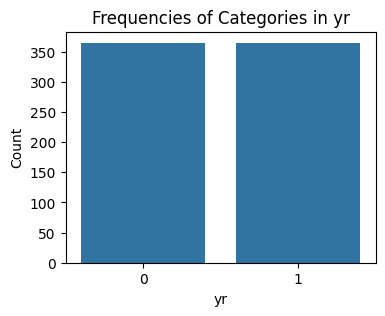

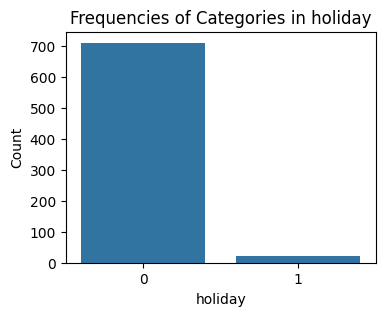

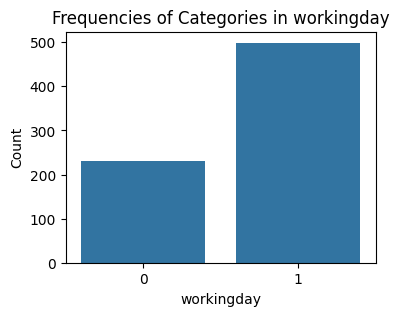

In [ ]:
for column in binary_num_columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequencies of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

The number of records for workingdays are higher than non working day. The number of records for holidays are quite lesser than non holidays.

Visualizing plots of target variable cnt against the binary categories 0 and 1 of the columns 'yr', 'holiday', 'workingday' to understand the behavior of bike bookings with respect to these categories.

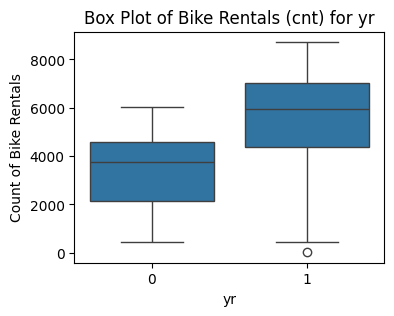

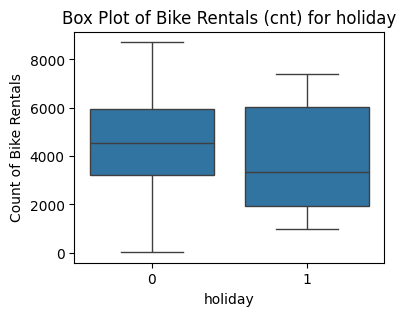

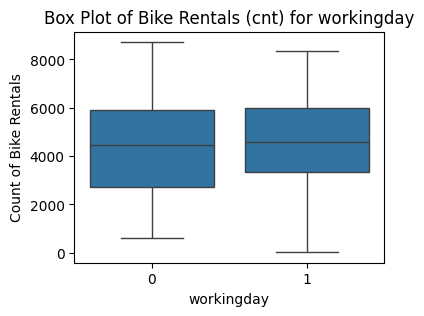

In [ ]:
for column in binary_num_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df, x=column, y='cnt')
    plt.title(f'Box Plot of Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Bike Rentals')
    #plt.xticks(rotation=45)
    plt.show()

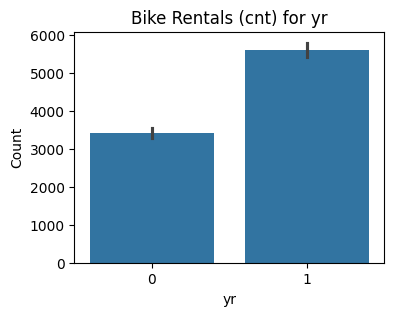

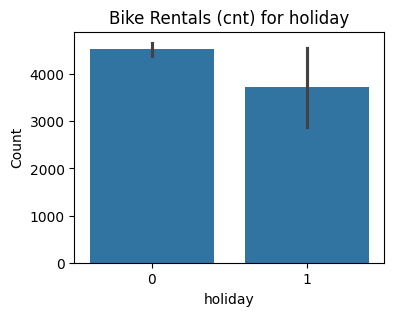

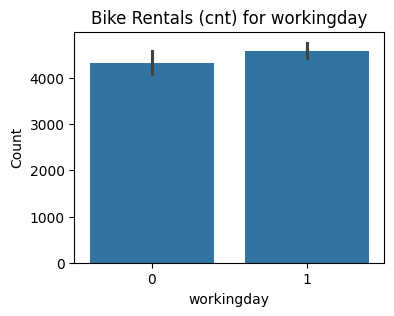

In [ ]:
for column in binary_num_columns:
    plt.figure(figsize=(4, 3))
    sns.barplot(x=column, y='cnt', data=df)
    plt.title(f'Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    #plt.xticks(rotation=45)
    plt.show()

Insights

- The average bike bookings are more in yr value 1 (2019) than yr value 0 (2018). This means the bike sharing company is making good progress in their business.
- Holidays have lesser average bike bookings than non holidays.
- The average bike bookings on working days are higher than non working days.

In [ ]:
categorical_columns=df.select_dtypes(include=['category','object']).columns.tolist()
print(categorical_columns)

['season', 'mnth', 'weekday', 'weathersit']


Visualizing barplots for 'season', 'mnth', 'weekday', 'weathersit'.

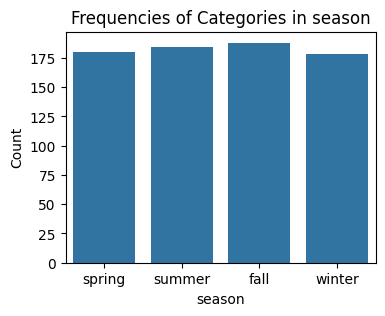

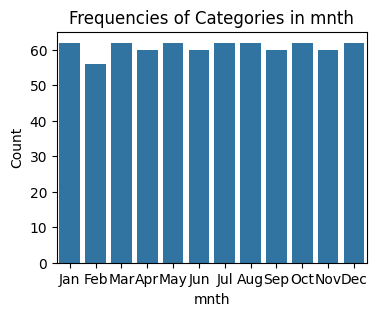

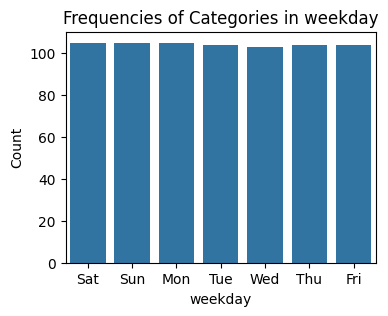

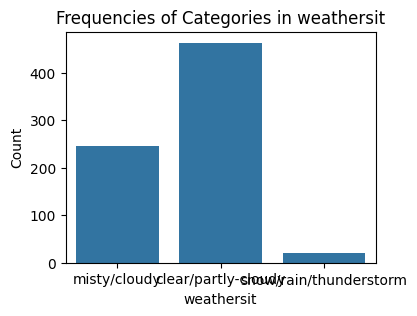

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df, x=column)
    plt.title(f'Frequencies of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')

    plt.show()

The records for fall season are slightky higher than rest. The records for clear/partly-cloudy weather situation is highest.

Visualizing plots of target variable cnt against the categories of the columns 'season', 'mnth', 'weekday', 'weathersit' to understand the beavior of bike bookings with respect to these categories.

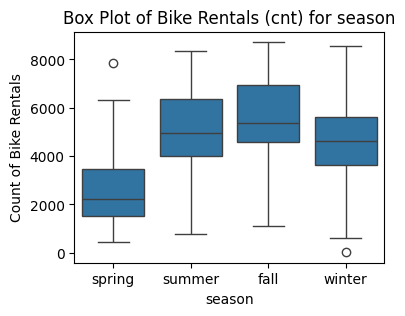

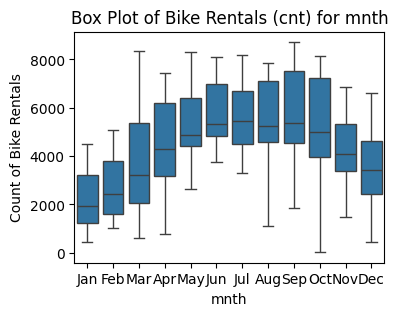

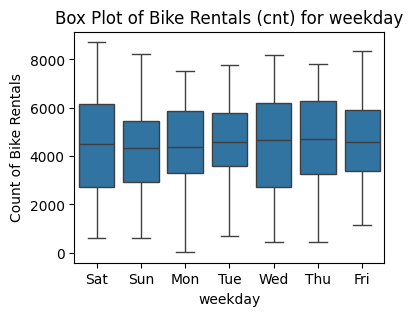

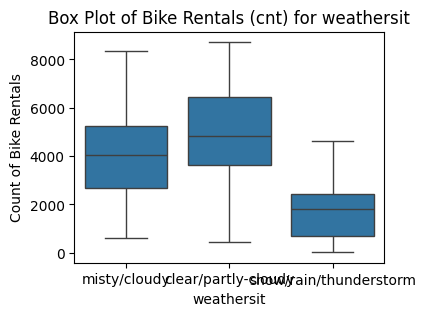

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(4, 3))
    sns.boxplot(data=df, x=column, y='cnt')
    plt.title(f'Box Plot of Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Bike Rentals')

    plt.show()

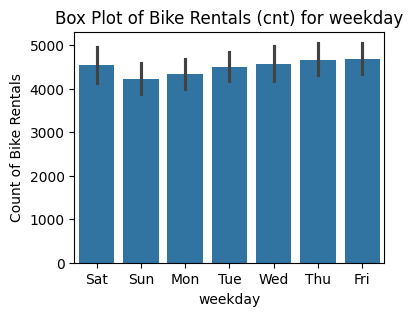

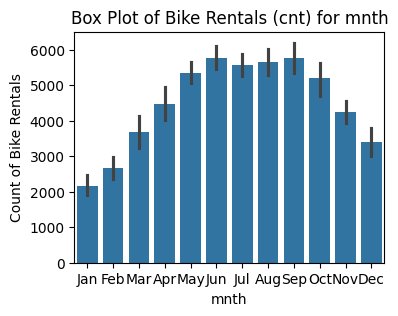

In [ ]:
for column in ['weekday','mnth']:
    plt.figure(figsize=(4, 3))
    sns.barplot(x=column, y='cnt',data=df)
    plt.title(f'Box Plot of Bike Rentals (cnt) for {column}')
    plt.xlabel(column)
    plt.ylabel('Count of Bike Rentals')

    plt.show()

Insights

- Fall season has clearly attracted the highest number of bike bookings compared to other seasons.
- Bike bookings rise from the starting months , tend to peak in the middle months of the year, with particularly high demand during the months jun, jul, aug, sep and then gradually decrease.
- bike bookings on weekdays dont show significantly strong patterns. Thu, Fri, Sat seem to have slightly higher bookings than rest.
- clear/partly cloudy weather attracted highest bike bookings followed by misty/cloudy with the lowest bike bookings in snow/rain/thunderstorm weather. It is natural that people prefer clear weather conditions for going out with bikes.

Creating Derived Column 'Weekend'

We will create a column called 'Weekend'. For weekdays Mon, Tue, Wed, Thurs, Fri this will show 0, for weekends i.e Sat, Sun this will show 1. We will use this column to see if we can find any noticeable pattern with bike booking counts.

In [ ]:
df2=df.copy()
df2['weekend']=df2['weekday'].apply(lambda x: 1 if x in ['Sat','Sun'] else 0)

<Axes: xlabel='weekend', ylabel='cnt'>

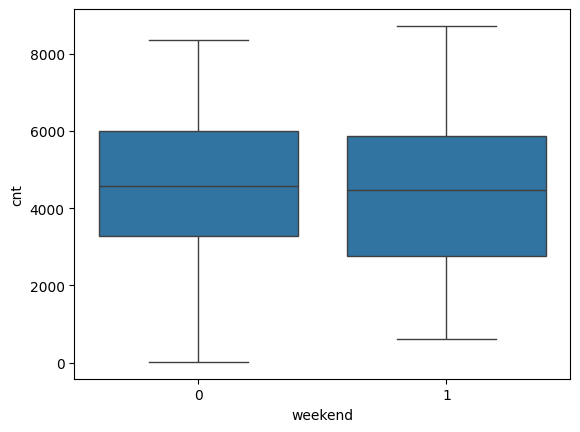

In [ ]:
sns.boxplot(data=df2, x='weekend', y='cnt')

<Axes: xlabel='weekend', ylabel='cnt'>

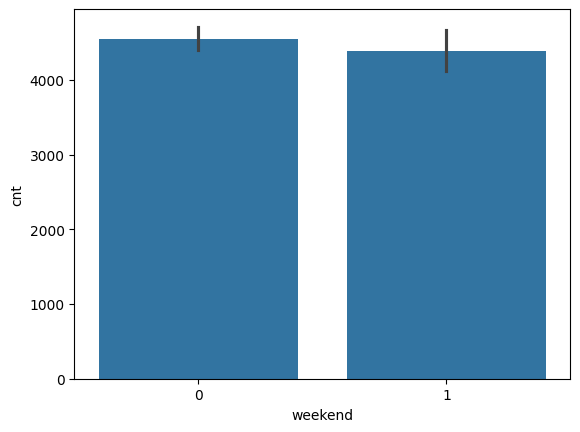

In [ ]:
sns.barplot(x='weekend', y='cnt', data=df2)

# Data Preparation

> Creating Dummy Variables For Categorical Columns

> Splitting data in train and test sets

> Rescaling

Creating dummy variables for categorical columns for model to understand and learn.

In [17]:
# creating dummy variables for the categories
months_df=pd.get_dummies(df['mnth'],drop_first=True,dtype='int64')
weathersit_df=pd.get_dummies(df['weathersit'],drop_first=True,dtype='int64')
weekday_df=pd.get_dummies(df['weekday'],drop_first=True,dtype='int64')
seasons_df=pd.get_dummies(df['season'],drop_first=True,dtype='int64')

In [18]:
# merging with original data
df = pd.concat([df,months_df,weekday_df,weathersit_df,seasons_df],axis=1)

In [19]:
# dropping redundant columns
df.drop(['season','mnth','weathersit','weekday'], axis = 1, inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    int64  
 9   Dec                     730 non-null    int64  
 10  Feb                     730 non-null    int64  
 11  Jan                     730 non-null    int64  
 12  Jul                     730 non-null    int64  
 13  Jun                     730 non-null    int64  
 14  Mar                     730 non-null    in

In [ ]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,misty/cloudy,snow/rain/thunderstorm,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,1,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [21]:
dfx=df.copy(deep=True)

Splitting Data in Train and Test Sets

In [ ]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

# Output the shapes of the resulting sets
print("x_train shape:", df_train.shape)
print("x_test shape:", df_test.shape)

x_train shape: (510, 30)
x_test shape: (219, 30)


ReScaling

Rescaling numerical variables of varying ranges and magnitudes in a consistent magnitude scale so that model treats all variables impartially and equally. Scaling values in range of 0 and 1 using MinMaxScaler().

In [ ]:
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [ ]:
scaler=MinMaxScaler()

In [ ]:
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,misty/cloudy,snow/rain/thunderstorm,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0


Checking correlation matrix

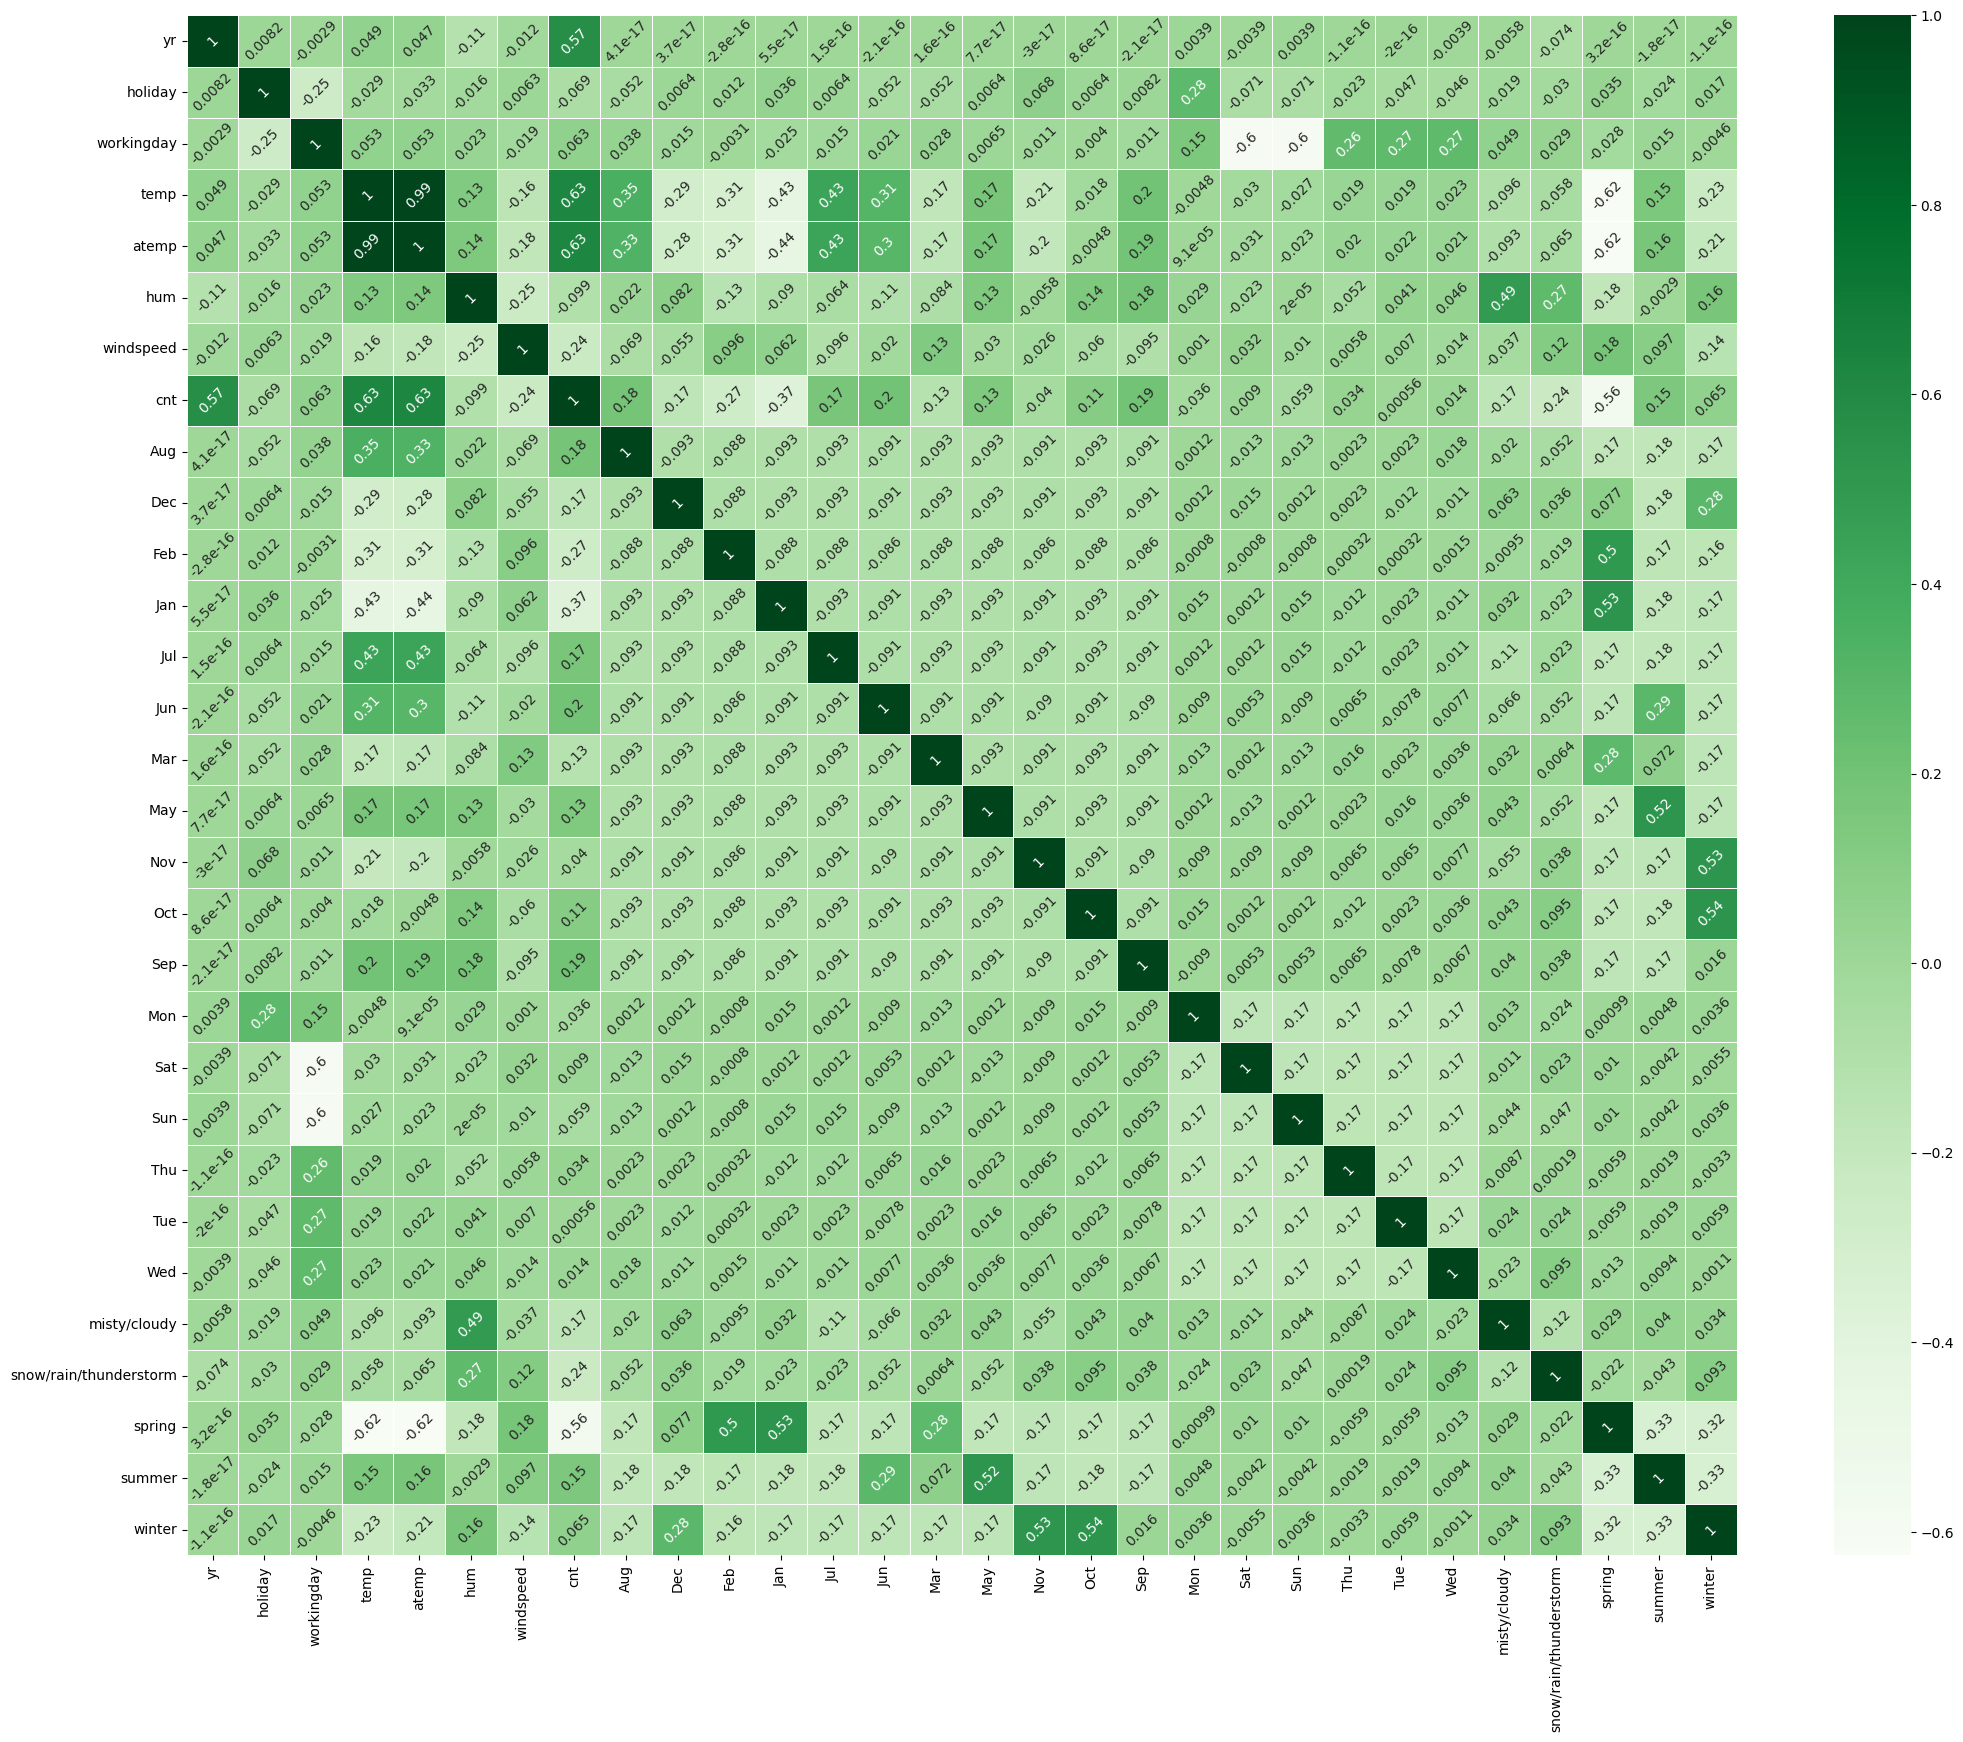

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Greens',annot_kws={'rotation': 45},linecolor='white', linewidth=0.5)
plt.show()

# Building Model - Linear Regression

> Dividing X and Y sets

> Untuned Model with All Features

> Coarse Tuning with RFE

> Fine Tuning with Stats Model and VIF checking

Dividing into X and Y sets for the model building

In [ ]:
x_train = df_train.copy()
y_train = x_train.pop('cnt')
print(y_train.shape)
print(x_train.shape)

(510,)
(510, 29)


Untuned Model with all features

In [ ]:
traindata_untuned=sm.add_constant(x_train)
lm=sm.OLS(y_train,traindata_untuned).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          8.42e-181
Time:                        14:48:53   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2452      0.035      6.953      0.000       0.176       0.315
yr                         0.2322      0.008     28.792      0.000       0.216       0.248
holiday                    0.0107      0.024      0.443      0.658      -0.037       0.058
workingday                 0.0970      0.012      7.903      0.000       0.073       0.121
temp                       0.4013      0.142      2.821      0.005       0.122       0.681
atemp                      0.0506      0.138      0.366      0.714      -0.221       0.322
hum                       -0.1518      0.039     -3.940      0.000      -0.228      -0.076
windspeed                 -0.1844      0.026     -7.003      0.000      -0.236      -0.133
Aug                        0.0161      0.034      0.473      0.637      -0.051       0.083
Dec                       -0.0456      0.034     -1.356      0.176      -0.112       0.020
Feb                       -0.0322      0.033     -0.978      0.329      -0.097       0.032
Jan                       -0.0626      0.034     -1.864      0.063      -0.129       0.003
Jul                       -0.0393      0.035     -1.116      0.265      -0.108       0.030
Jun                       -0.0017      0.025     -0.067      0.946      -0.051       0.048
Mar                        0.0013      0.025      0.052      0.958      -0.047       0.050
May                        0.0247      0.021      1.169      0.243      -0.017       0.066
Nov                       -0.0418      0.036     -1.149      0.251      -0.113       0.030
Oct                        0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                        0.0818      0.032      2.549      0.011       0.019       0.145
Mon                       -0.0215      0.015     -1.395      0.164      -0.052       0.009
Sat                        0.0961      0.014      6.984      0.000       0.069       0.123
Sun                        0.0415      0.014      2.974      0.003       0.014       0.069
Thu                       -0.0097      0.016     -0.625      0.532      -0.040       0.021
Tue                       -0.0193      0.016     -1.242      0.215      -0.050       0.011
Wed                       -0.0057      0.015     -0.384      0.701      -0.035       0.024
misty/cloudy              -0.0610      0.010     -5.845      0.000      -0.082      -0.041
snow/rain/thunderstorm    -0.2567      0.026     -9.712      0.000      -0.309      -0.205
spring                    -0.0486      0.030     -1.618      0.106      -0.108       0.010
summer                     0.0382      0.026      1.455      0.146      -0.013       0.090
winter                     0.1054      0.028      3.770      0.000       0.050       0.160
==============================================================================
O

In [ ]:
X = x_train
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.60
3,temp,67.12
4,atemp,56.09
19,Sat,19.72
20,Sun,18.35
26,spring,10.80
28,winter,9.52
27,summer,8.31
15,Nov,6.80
16,Oct,6.59


We cannot accept the untuned model as is even though it has higher R2, because there are many features with very high p value and very high VIF indicating that there are lot of insignificant features and high multicollinearity among many features thus implying all features dont have a meaningful contribution to the model.

Coarse Tuning by RFE

Picking top 15 features

In [ ]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(x_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(x_train, y_train)

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 15),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('misty/cloudy', True, 1),
 ('snow/rain/thunderstorm', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [ ]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'misty/cloudy',
       'snow/rain/thunderstorm', 'spring', 'summer', 'winter'],
      dtype='object')

In [ ]:
selected_cols=x_train.columns[rfe.support_]
selected_cols

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jul', 'Sep',
       'Sat', 'Sun', 'misty/cloudy', 'snow/rain/thunderstorm', 'spring',
       'summer', 'winter'],
      dtype='object')

Checking correlation matrix for the selected features

In [ ]:
correlation_cols=['cnt']
correlation_cols.extend(selected_cols)
correlation_cols

['cnt',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'Jul',
 'Sep',
 'Sat',
 'Sun',
 'misty/cloudy',
 'snow/rain/thunderstorm',
 'spring',
 'summer',
 'winter']

In [ ]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'misty/cloudy',
       'snow/rain/thunderstorm', 'spring', 'summer', 'winter'],
      dtype='object')

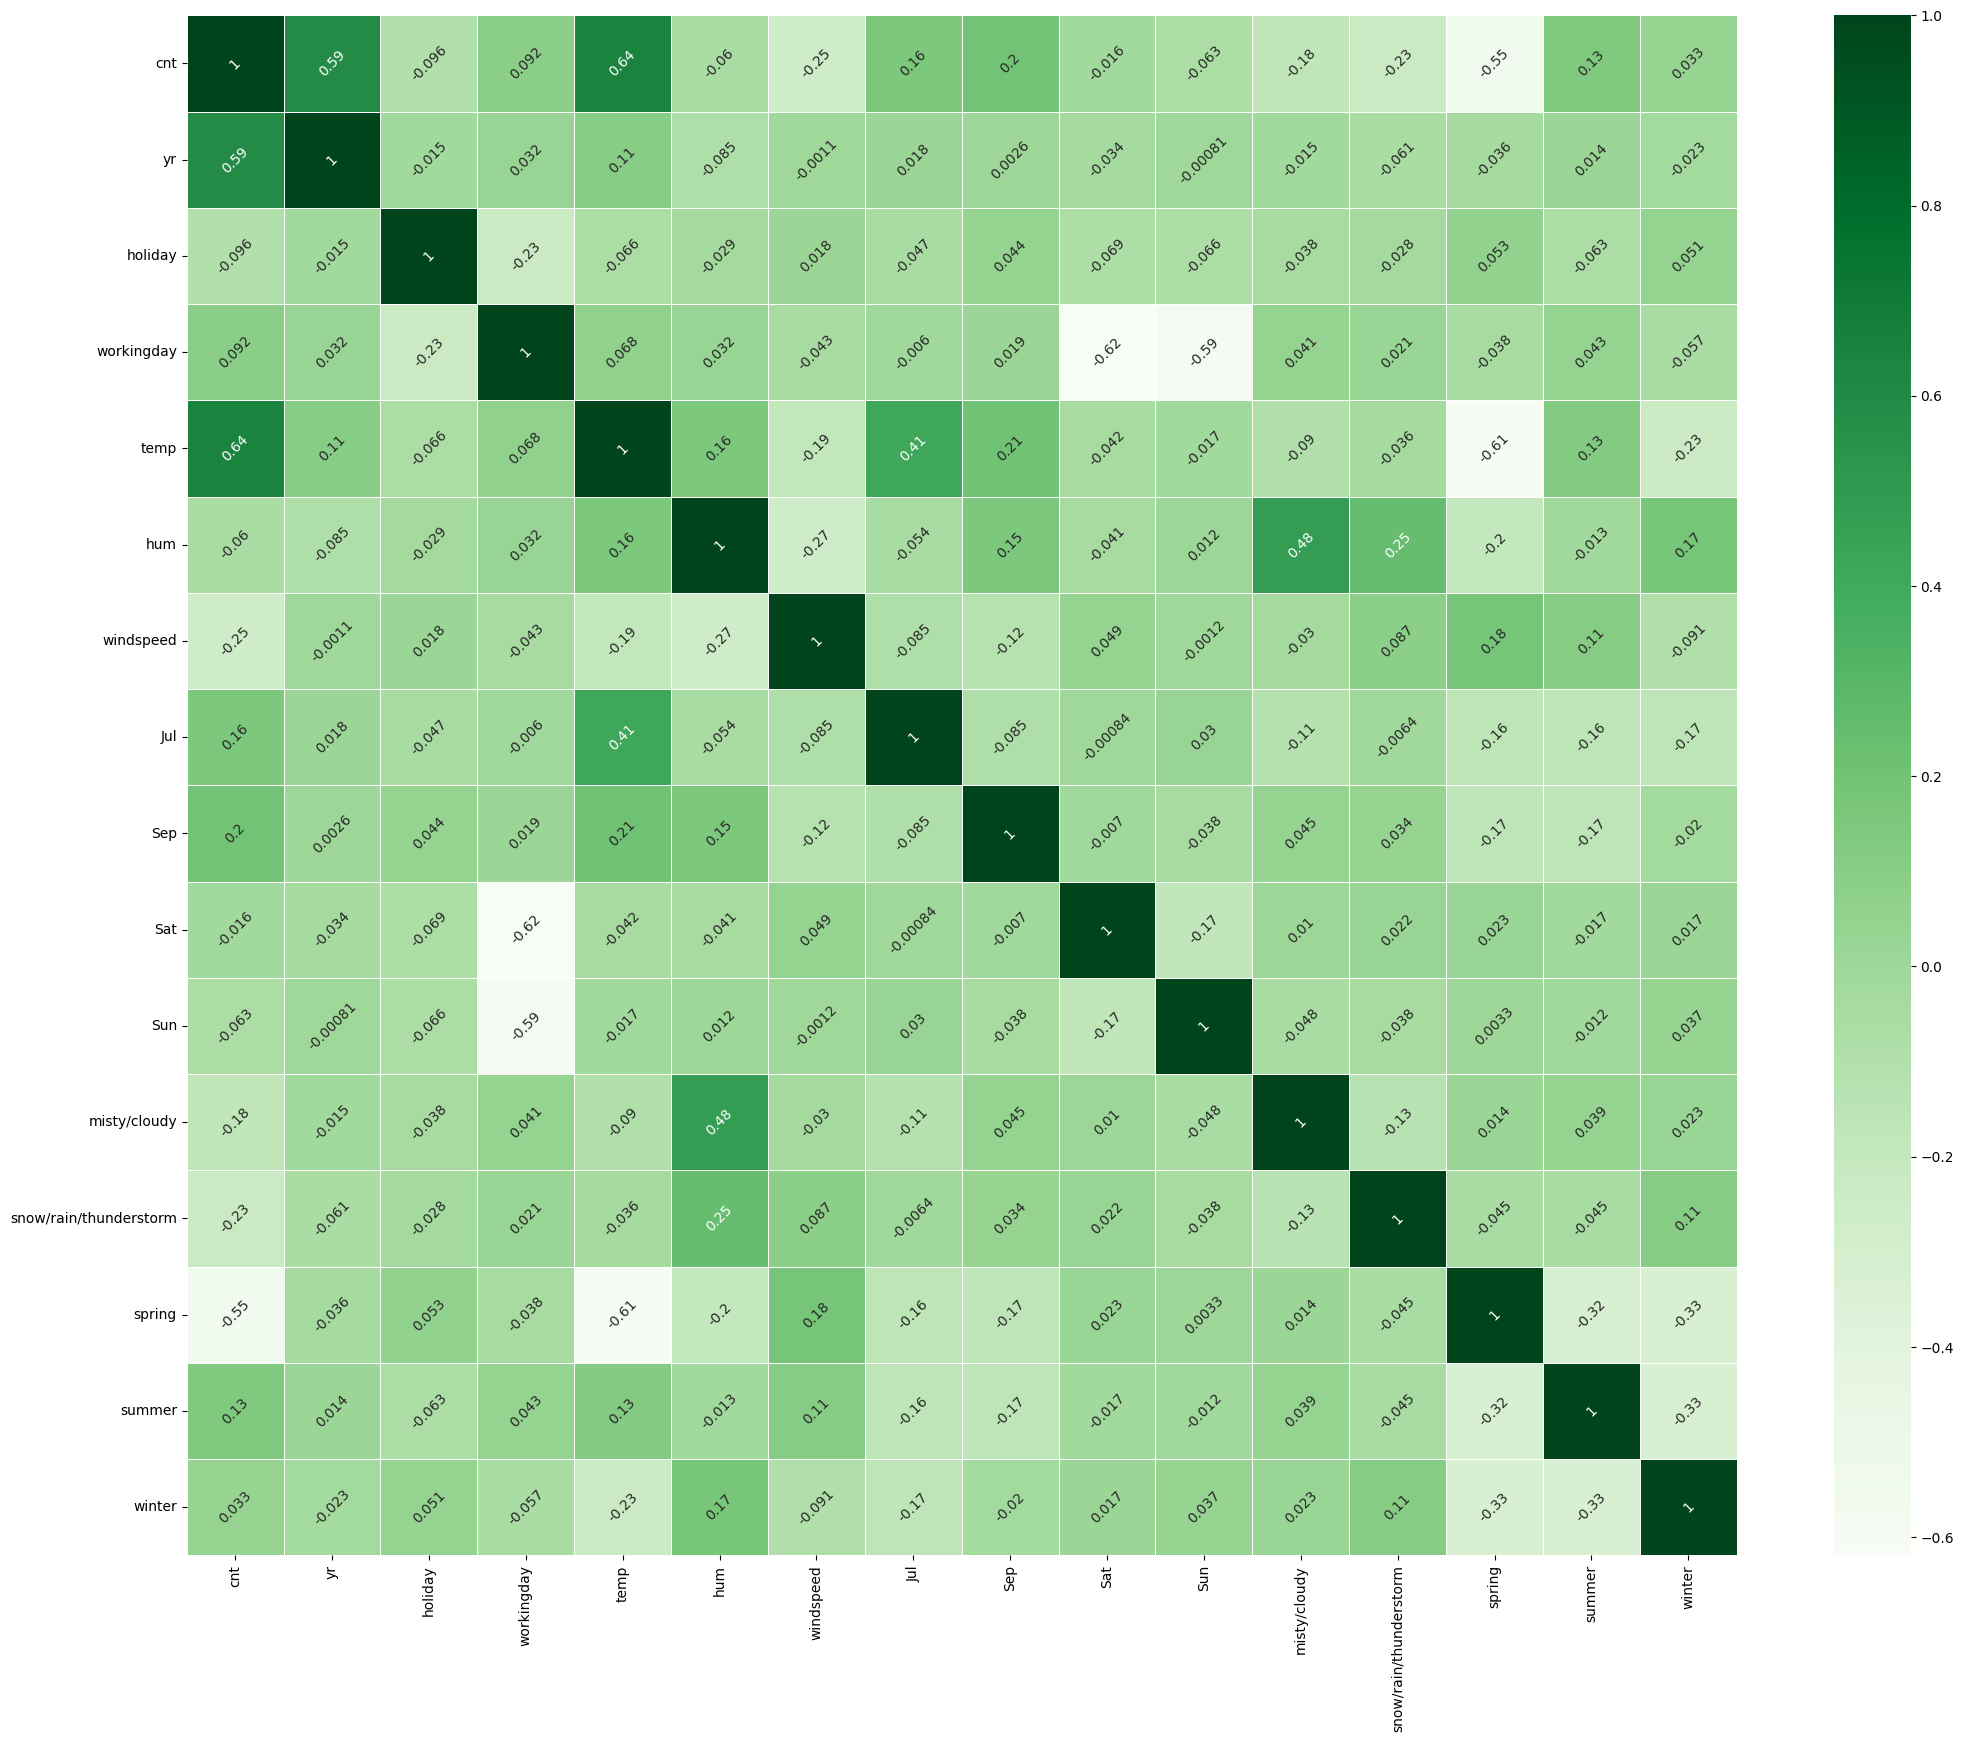

In [ ]:
dfcorr=df_train[correlation_cols]
plt.figure(figsize=(25,20))
sns.heatmap(dfcorr.corr(),annot=True,cmap='Greens',annot_kws={'rotation': 45},linecolor='white', linewidth=0.5)
plt.show()

Fine tuning

Creating 2 functions for model building using stats model and VIF calculation

In [ ]:
# function to build statsmodel adn print summary

def build_stats_model(trainlabels,traindata):
  traindata=sm.add_constant(traindata)
  lm=sm.OLS(trainlabels,traindata).fit()
  print(lm.summary())
  return lm,traindata


In [ ]:
# function to calculate VIF

def calc_vif(traindata):
  vif = pd.DataFrame()
  X = traindata
  vif['Features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)



Model 1

Building model using statsmodel, for the detailed statistics

In [ ]:
x_train_rfe=x_train[selected_cols]

In [ ]:
lm1,x_train_rfe_const=build_stats_model(y_train,x_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        14:48:56   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe)

                  Features    VIF
2               workingday  50.69
8                      Sat  12.20
9                      Sun  11.79
12                  spring   5.02
3                     temp   3.62
14                  winter   3.49
1                  holiday   2.91
13                  summer   2.61
4                      hum   1.91
10            misty/cloudy   1.57
6                      Jul   1.49
7                      Sep   1.30
11  snow/rain/thunderstorm   1.25
5                windspeed   1.20
0                       yr   1.03


holiday has highest p value, hence removing it.

Model 2

In [ ]:
x_train_rfe_2=x_train_rfe.drop(['holiday'],axis=1)

rebuilding model

In [ ]:
lm2,x_train_rfe_2_const=build_stats_model(y_train,x_train_rfe_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        14:49:18   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe_2)

                  Features    VIF
3                      hum  32.14
2                     temp  18.98
1               workingday  18.41
7                      Sat   4.91
4                windspeed   4.90
11                  spring   4.80
8                      Sun   4.76
13                  winter   3.71
12                  summer   3.03
9             misty/cloudy   2.31
0                       yr   2.09
5                      Jul   1.60
6                      Sep   1.38
10  snow/rain/thunderstorm   1.25


hum has highest VIF, hence we drop it.

Model 3

In [ ]:
x_train_rfe_3=x_train_rfe_2.drop(['hum'],axis=1)

Rebuilding

In [ ]:
lm3,x_train_rfe_3_const=build_stats_model(y_train,x_train_rfe_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          5.73e-189
Time:                        14:50:08   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe_3)

                  Features    VIF
1               workingday  16.19
2                     temp  12.73
3                windspeed   4.75
6                      Sat   4.45
7                      Sun   4.21
10                  spring   3.82
12                  winter   2.80
11                  summer   2.75
0                       yr   2.07
4                      Jul   1.60
8             misty/cloudy   1.58
5                      Sep   1.35
9   snow/rain/thunderstorm   1.09


Since workingday has highest VIF, we drop it.

Model 4

In [ ]:
x_train_rfe_4=x_train_rfe_3.drop(['workingday'],axis=1)

In [ ]:
lm4,x_train_rfe_4_const=build_stats_model(y_train,x_train_rfe_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.01e-186
Time:                        14:51:09   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe_4)

                  Features   VIF
1                     temp  5.17
2                windspeed  4.62
10                  summer  2.23
9                   spring  2.11
0                       yr  2.07
11                  winter  1.82
3                      Jul  1.59
7             misty/cloudy  1.55
4                      Sep  1.33
5                      Sat  1.22
6                      Sun  1.21
8   snow/rain/thunderstorm  1.08


Since Sat has highest p value we drop it.

Model 5

In [ ]:
x_train_rfe_5=x_train_rfe_4.drop(['Sat'],axis=1)

In [ ]:
lm5,x_train_rfe_5_const=build_stats_model(y_train,x_train_rfe_5)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.65e-187
Time:                        14:51:36   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe_5)

                  Features   VIF
1                     temp  5.13
2                windspeed  4.60
9                   summer  2.22
8                   spring  2.09
0                       yr  2.07
10                  winter  1.80
3                      Jul  1.59
6             misty/cloudy  1.55
4                      Sep  1.33
5                      Sun  1.17
7   snow/rain/thunderstorm  1.08


temp has highest VIF. But from the pairplots we found that temp is clearly linearly related with target variable cnt and it is important from the business perspective. Hence we keep it. Since windspeed has second highest VIF we drop it.

Model 6

In [ ]:
x_train_rfe_6=x_train_rfe_5.drop(['windspeed'],axis=1)

In [ ]:
lm6,x_train_rfe_6_const=build_stats_model(y_train,x_train_rfe_6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          2.94e-181
Time:                        14:52:32   Log-Likelihood:                 481.93
No. Observations:                 510   AIC:                            -941.9
Df Residuals:                     499   BIC:                            -895.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
calc_vif(x_train_rfe_6)

                 Features   VIF
1                    temp  4.26
0                      yr  2.06
8                  summer  1.93
9                  winter  1.59
2                     Jul  1.58
5            misty/cloudy  1.54
7                  spring  1.41
3                     Sep  1.33
4                     Sun  1.17
6  snow/rain/thunderstorm  1.07


We will consider Model 6 for proceeding further as all the predictors have very low p value indicating they are significant. Also, this model shows very low multicollinearity between the predictors as the VIF values of all of them are below the permissible range of 5. The Prob (F-statistic) is also very less indicating that the overall model fit is significant.

In [ ]:
x_train_rfe_6_const.head()

,const,yr,temp,Jul,Sep,Sun,misty/cloudy,snow/rain/thunderstorm,spring,summer,winter
653,1.0,1,0.509887,0,0,0,0,0,0,0,1
576,1.0,1,0.815169,1,0,0,0,0,0,0,0
426,1.0,1,0.442393,0,0,0,1,0,1,0,0
728,1.0,1,0.245101,0,0,1,0,0,1,0,0
482,1.0,1,0.395666,0,0,0,1,0,0,1,0


In [ ]:
x_train_rfe_6_const.shape

(510, 11)

In [ ]:
y_train.shape

(510,)

# Residual Error Analysis & Other Assumptions Validation

> Independence of Residuals

> Normality of Error Terms

> Homoscedasticity

> Multicollinearity

> Linearity



Independence of residuals

Durbin-Watson value of Model 5 is 2.002, indicating there is no autocorrelation in the residuals.

Normality of Residuals

Text(0.5, 0, 'Residual')

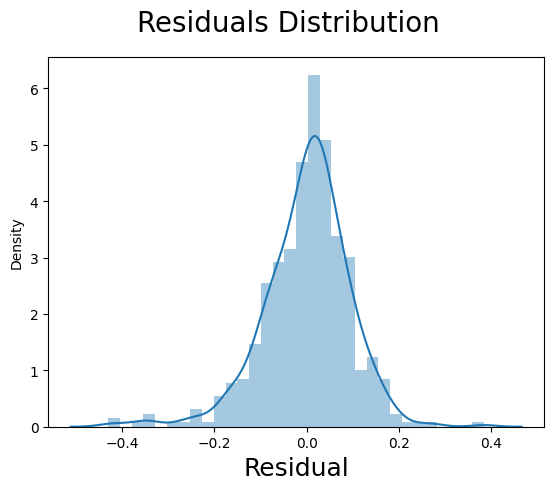

In [ ]:
y_train_pred=lm6.predict(x_train_rfe_6_const)
# Ploting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Residuals Distribution', fontsize = 20)
plt.xlabel('Residual', fontsize = 18)

Residuals are normally distributed.

Homoscedasticity

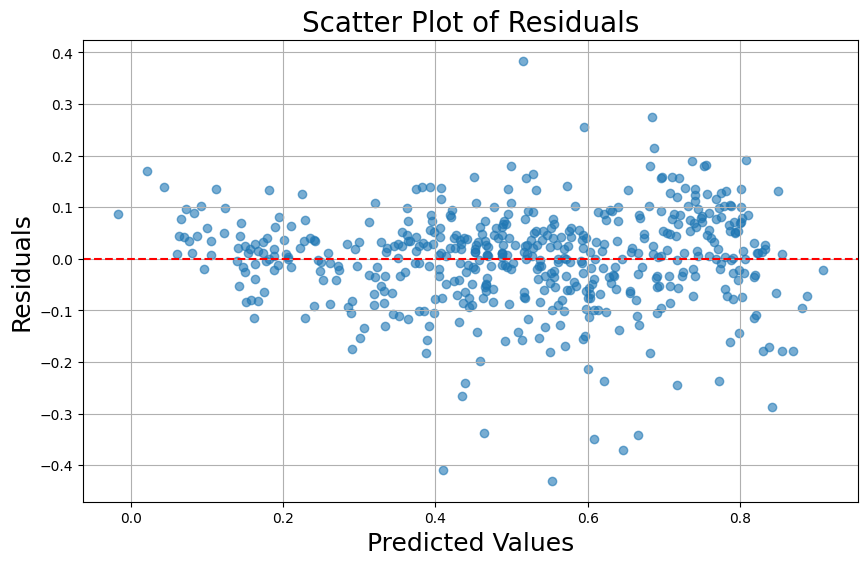

In [ ]:
# Calculate the error terms
errors = y_train - y_train_pred

# Create a scatter plot of predicted values vs. errors
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, errors, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Scatter Plot of Residuals', fontsize=20)
plt.xlabel('Predicted Values', fontsize=18)
plt.ylabel('Residuals', fontsize=18)
plt.grid(True)
plt.show()

No specific pattern is observed in above plot.

Multicollinearity

In [ ]:
calc_vif(x_train_rfe_6)

                 Features   VIF
1                    temp  4.26
0                      yr  2.06
8                  summer  1.93
9                  winter  1.59
2                     Jul  1.58
5            misty/cloudy  1.54
7                  spring  1.41
3                     Sep  1.33
4                     Sun  1.17
6  snow/rain/thunderstorm  1.07


VIF values for all features are below 5, indicating that there is no multicollinearity.

Linearity

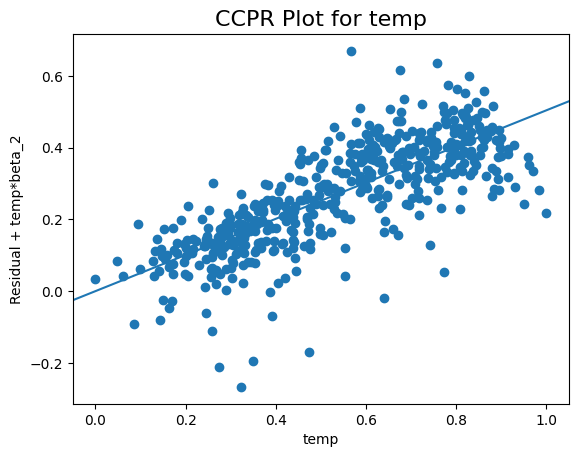

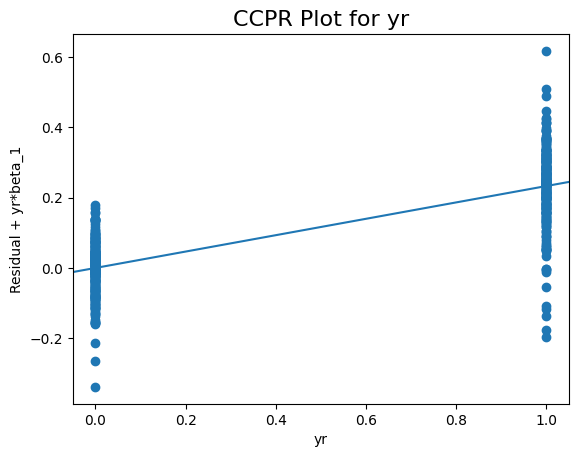

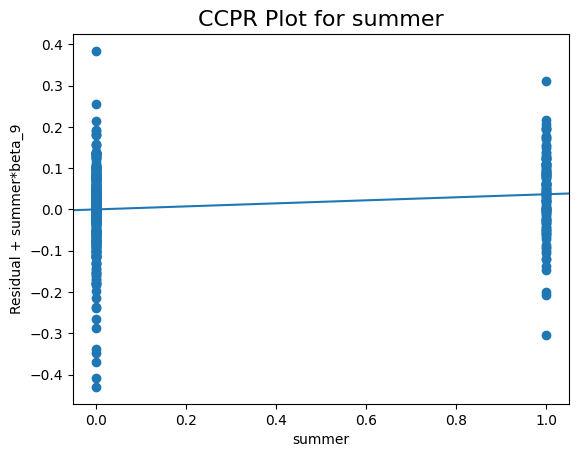

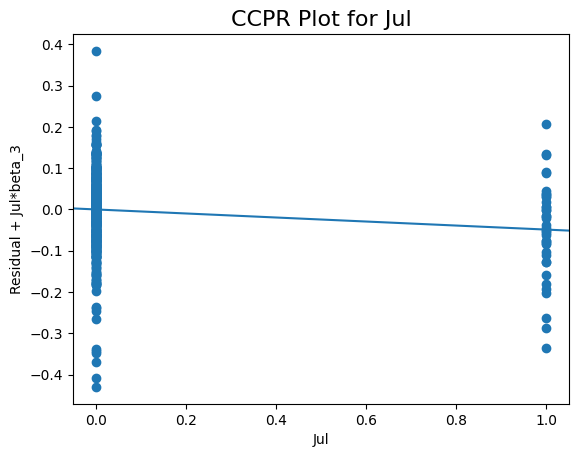

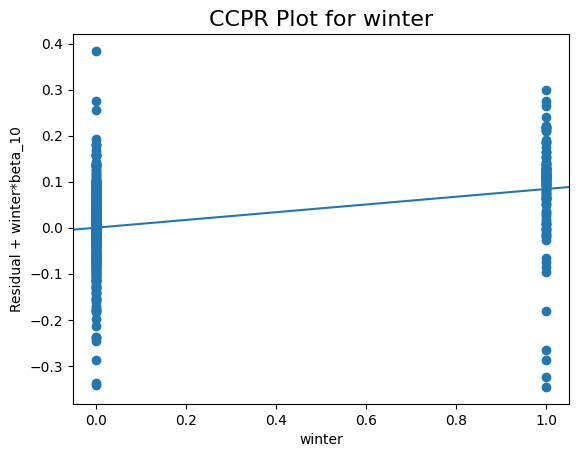

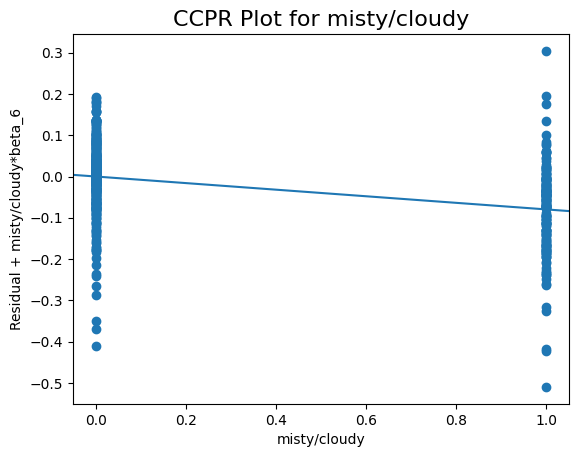

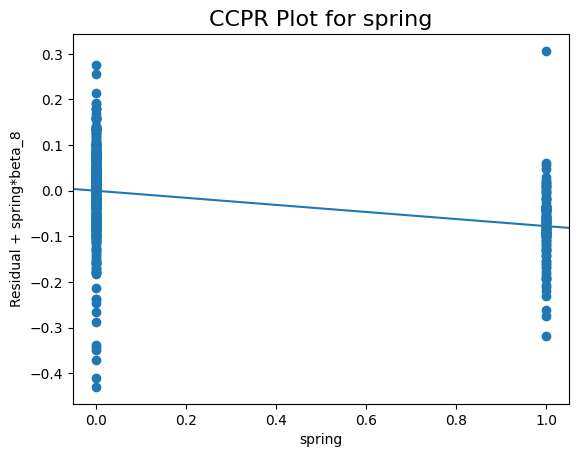

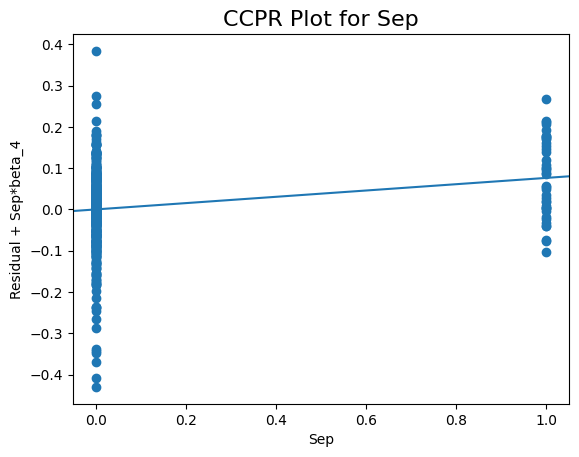

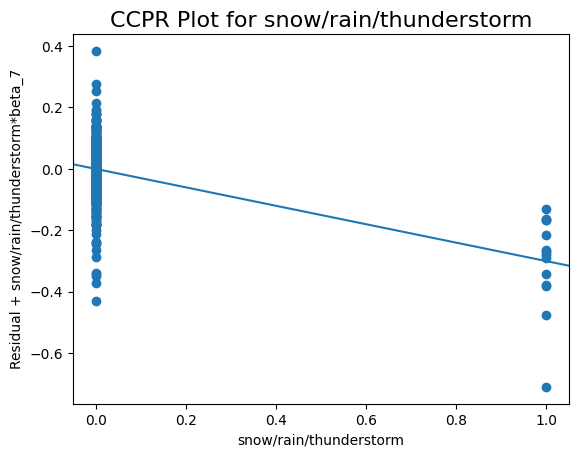

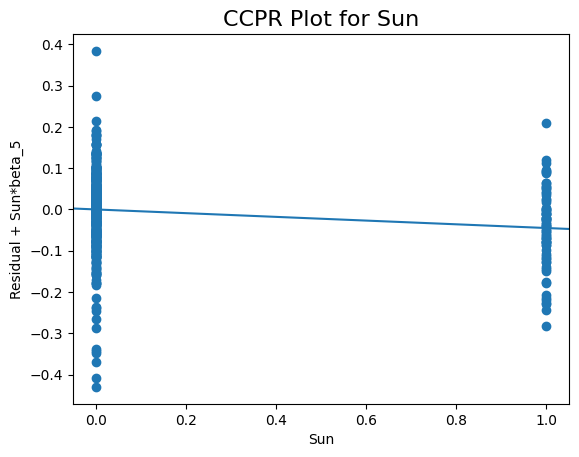

In [ ]:
# Linear relationship validation using CCPR (Component and component plus residual) plot


features = [
    'temp',
    'yr',
    'summer',
    'Jul',
    'winter',
    'misty/cloudy',
    'spring',
    'Sep',
    'snow/rain/thunderstorm',
    'Sun'
]


for feature in features:
    sm.graphics.plot_ccpr(lm6, feature)
    plt.title(f'CCPR Plot for {feature}', fontsize=16)
    plt.show()

CCPR plots show straight line indicating that there is linear relationship of the target variable with all the feature variables.

# Testing Data

Rescaling test data

In [ ]:
df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,misty/cloudy,snow/rain/thunderstorm,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
y_test=df_test.pop('cnt')
x_test=df_test
print(y_test.shape)
print(x_test.shape)

(219,)
(219, 29)


Filtering the required columns

In [ ]:
x_test=x_test[x_train_rfe_6.columns]
x_test.shape

(219, 10)

In [ ]:
x_test.head()

,yr,temp,Jul,Sep,Sun,misty/cloudy,snow/rain/thunderstorm,spring,summer,winter
184,0,0.831783,1,0,0,1,0,0,0,0
535,1,0.901354,0,0,0,0,0,0,1,0
299,0,0.511964,0,0,0,1,0,0,0,1
221,0,0.881625,0,0,0,0,0,0,0,0
152,0,0.817246,0,0,0,0,0,0,1,0


In [ ]:
# Adding constant variable to test dataframe
x_test_lm6 = sm.add_constant(x_test)

In [ ]:
y_pred = lm6.predict(x_test_lm6)

# Model Evaluation

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8098104466244752

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,3)

0.81

In [ ]:
p = x_test_lm6.shape[1]  # number of features
n = len(y_test) # number of data points
# Adjusted R-squared formula
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(round(adj_r2, 3))

0.8


Text(0, 0.5, 'y_pred')

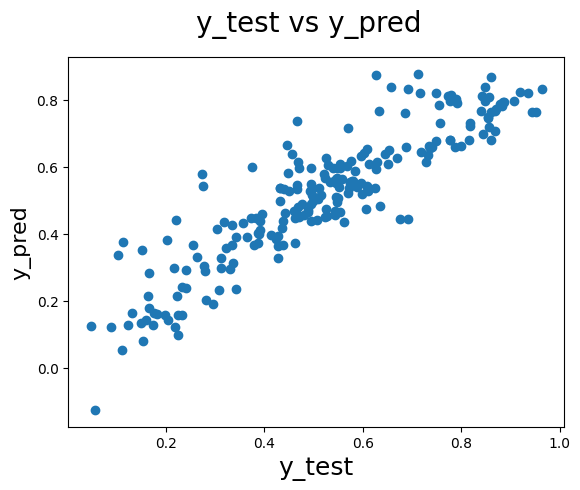

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

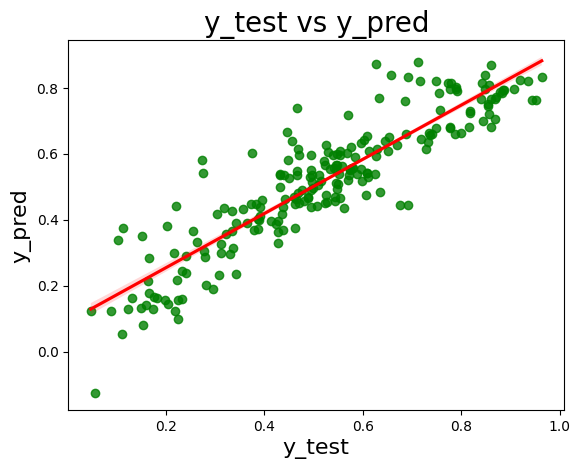

In [ ]:
plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Linear Regression Equation

In [ ]:
round(lm6.params,4)

,0
const,0.1535
yr,0.2328
temp,0.5044
Jul,-0.0488
Sep,0.0764
Sun,-0.0450
misty/cloudy,-0.0798
snow/rain/thunderstorm,-0.3004
spring,-0.0776
summer,0.0368


**Equation for the best fit line is** :

cnt = 0.1535 + 0.2328(yr) + 0.5044(temp) − 0.0488(Jul) + 0.0764(Sep) − 0.0450(Sun) − 0.0798(misty/cloudy) − 0.3004(snow/rain/thunderstorm) − 0.0776(spring) + 0.0368(summer) + 0.0842(winter)



# Train Test Model Result Comparison

- Train dataset R^2 = 0.824

- Train dataset Adjusted R^2 = 0.821

-  Test dataset R^2 = 0.81

- Test dataset Adjusted R^2 = 0.8

# Conclusion - Linear Regression

- The features used in the prediction of the target variable cnt (bike bookings) are:
yr, temp, Jul, Sep, Sun, misty/cloudy, snow/rain/thunderstorm, spring, summer, winter







- As per the absolute values of the coefficients or weights of the linear regression model, the top 3 features contributing significantly towards the demand of shared bikes are as follows:

1. temp : A one-unit increase in temp leads to 0.5044 increase in bike bookings. This suggests that warmer weather significantly drives bike demand.

2. yr : A unit increase in yr variable increases the bike hirings by 0.2328 units. This reflects a rising trend in demand over time, indicating business growth.


3. snow/rain/thunderstorm: : A unit increase in snow/rain/thunderstorm decreases bike bookings by 0.3004 units. This indicates that adverse weather conditions negatively impact bike demand.

The analysis reveals that bike demand is mainly positively influenced by warmer temperatures and an increasing trend over the years, while adverse weather conditions (snow/rain/thunderstorm) tend to decrease bike bookings. Besides, other factors like Sun, Jul, Sep, misty/cloudy, spring, summer, winter also influence bike booking demands.



# Building Model - Ridge Regression

In [22]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    int64  
 9   Dec                     730 non-null    int64  
 10  Feb                     730 non-null    int64  
 11  Jan                     730 non-null    int64  
 12  Jul                     730 non-null    int64  
 13  Jun                     730 non-null    int64  
 14  Mar                     730 non-null    in

In [23]:
# # removing atemp since high correlation of atemp with temp was clearly visible from pairplots, also lets drop yr too remove any time dependency
# dfx.drop(columns=['atemp','yr'],inplace=True)
# lets convert the categorical labels to uint8 for less space occupancy
columns_to_convert = ['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
                      'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'misty/cloudy', 'snow/rain/thunderstorm',
                      'spring', 'summer', 'winter']

dfx[columns_to_convert] = dfx[columns_to_convert].astype('uint8')
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    uint8  
 9   Dec                     730 non-null    uint8  
 10  Feb                     730 non-null    uint8  
 11  Jan                     730 non-null    uint8  
 12  Jul                     730 non-null    uint8  
 13  Jun                     730 non-null    uint8  
 14  Mar                     730 non-null    ui

In [24]:
dfx1=dfx.copy(deep=True)


In [27]:
num_columns=['temp', 'hum', 'windspeed', 'cnt']

In [ ]:
# splitting
np.random.seed(0)
df2_train, df2_test = train_test_split(dfx, train_size=0.7, test_size=0.3, random_state=100)
# scaling
scaler=MinMaxScaler()
df2_train[num_columns] = scaler.fit_transform(df2_train[num_columns])
# splitting in x, y
x2_train = df2_train.copy()
y2_train = x2_train.pop('cnt')
print(y2_train.shape)
print(x2_train.shape)
# scaling test data
df2_test[num_columns] = scaler.transform(df2_test[num_columns])
# spliting in x, y
y2_test=df2_test.pop('cnt')
x2_test=df2_test
print(y2_test.shape)
print(x2_test.shape)

(510,)
(510, 29)
(219,)
(219, 29)


In [31]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score


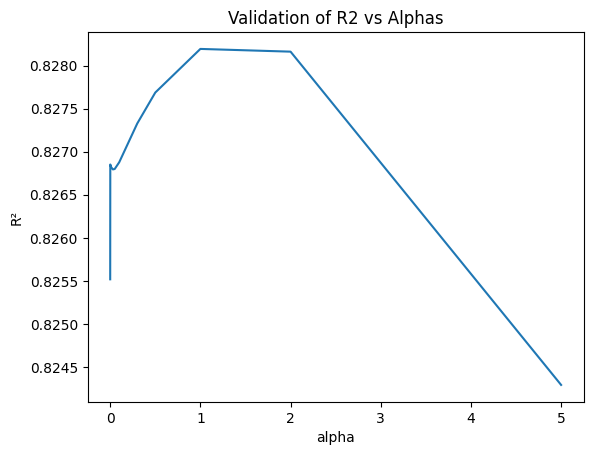

In [ ]:
def r2_cv(model):
    # Use r2 as scoring, no need for negation or square root
    r2 = cross_val_score(model, x2_train, y2_train, scoring="r2", cv=5)
    return r2

alphas = [0,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,5]

cv_ridge = [r2_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]

# Create a pandas Series to store the mean R2 for each alpha
cv_ridge = pd.Series(cv_ridge, index = alphas)

# Plot R2 scores
cv_ridge.plot(title = "Validation of R2 vs Alphas")
plt.xlabel("alpha")
plt.ylabel("R²")
plt.show()

R2 shows its peak at alpha 1, so we keep alpha as 1.

In [ ]:
ridge=Ridge(alpha=1)
ridge.fit(x2_train,y2_train)
y2_train_pred=ridge.predict(x2_train)
y2_test_pred=ridge.predict(x2_test)
r2train=r2_score(y2_train,y2_train_pred)
r2test=r2_score(y2_test,y2_test_pred)
print("train r2",r2train)
print("test r2",r2test)

train r2 0.8516648533912821
test r2 0.8340583357066931


Lets check the coefficients.

In [ ]:
coefficients = pd.DataFrame({"Feature": x2_train.columns, "Coefficient": ridge.coef_})
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients_sorted)

                   Feature  Coefficient
0                       yr     0.232248
3                     temp     0.110399
28                  winter     0.090112
17                     Sep     0.084168
2               workingday     0.034703
19                     Sat     0.031328
14                     May     0.031140
27                  summer     0.029183
7                      Aug     0.025980
16                     Oct     0.013613
12                     Jun     0.010324
4                    atemp     0.008660
13                     Mar     0.004686
23                     Wed    -0.007527
21                     Thu    -0.012260
22                     Tue    -0.020520
20                     Sun    -0.022326
18                     Mon    -0.024747
9                      Feb    -0.029285
11                     Jul    -0.030070
15                     Nov    -0.036067
8                      Dec    -0.040968
1                  holiday    -0.043706
10                     Jan    -0.059022


# Building Model - Lasso Regression

In [25]:
dfx1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   temp                    730 non-null    float64
 4   atemp                   730 non-null    float64
 5   hum                     730 non-null    float64
 6   windspeed               730 non-null    float64
 7   cnt                     730 non-null    int64  
 8   Aug                     730 non-null    uint8  
 9   Dec                     730 non-null    uint8  
 10  Feb                     730 non-null    uint8  
 11  Jan                     730 non-null    uint8  
 12  Jul                     730 non-null    uint8  
 13  Jun                     730 non-null    uint8  
 14  Mar                     730 non-null    ui

In [28]:
# splitting
np.random.seed(0)
df3_train, df3_test = train_test_split(dfx1, train_size=0.7, test_size=0.3, random_state=100)
scaler = MinMaxScaler()
df3_train[num_columns] = scaler.fit_transform(df3_train[num_columns])
x3_train = df3_train.copy()
y3_train = x3_train.pop('cnt')
print(y3_train.shape)
print(x3_train.shape)
df3_test[num_columns] = scaler.transform(df3_test[num_columns])
y3_test = df3_test.pop('cnt')
x3_test = df3_test
print(y3_test.shape)
print(x3_test.shape)

(510,)
(510, 29)
(219,)
(219, 29)


In [29]:
from sklearn.linear_model import Lasso

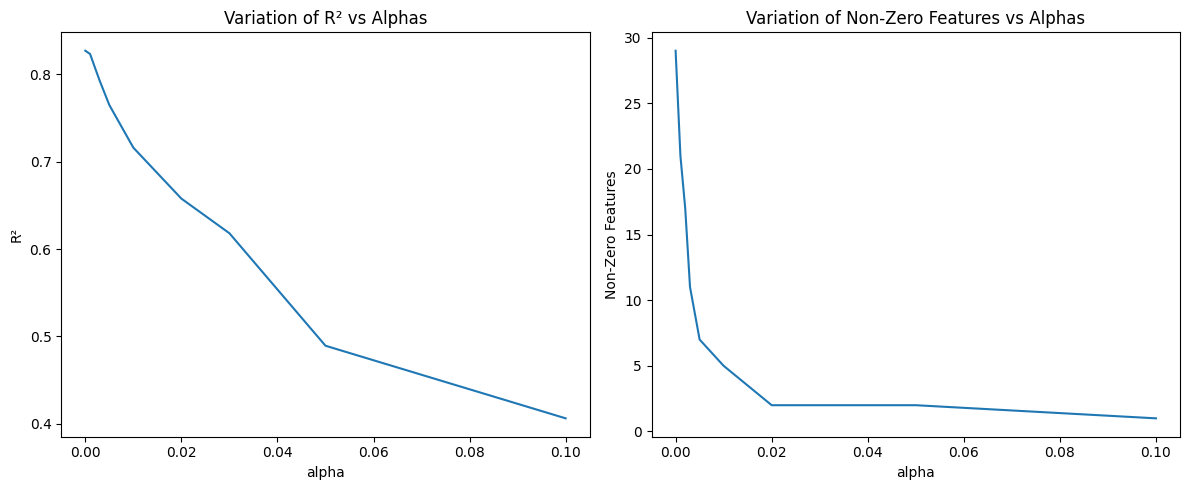

In [32]:
from sklearn.linear_model import Lasso


# Function to calculate R² and count non-zero coefficients
def get_metrics(model):
    # Cross-validation to get R² scores
    r2_scores = cross_val_score(model, x3_train, y3_train, scoring="r2", cv=5)

    # Count the number of non-zero coefficients
    model.fit(x3_train, y3_train)
    non_zero_features = (model.coef_ != 0).sum()
    return r2_scores.mean(), non_zero_features

# List of alpha values
alphas = [0,0.001,0.002,0.003,0.005,0.01,0.02,0.03,0.05,0.1]


r2_scores = []
non_zero_features_count = []


for alpha in alphas:
    lasso = Lasso(alpha=alpha)

    # Get R² and number of non-zero features
    r2, non_zero_features = get_metrics(lasso)

    # print(r2)
    # print(non_zero_features)

    # Store the results
    r2_scores.append(r2)
    non_zero_features_count.append(non_zero_features)


r2_series = pd.Series(r2_scores, index=alphas)
non_zero_features_series = pd.Series(non_zero_features_count, index=alphas)


plt.figure(figsize=(12, 5))

# Plot 1: R² vs. alpha
plt.subplot(1, 2, 1)
r2_series.plot(title="Variation of R² vs Alphas", xlabel="alpha", ylabel="R²")

# Plot 2: Number of Non-Zero Features vs. alpha
plt.subplot(1, 2, 2)
non_zero_features_series.plot(title="Variation of Non-Zero Features vs Alphas", xlabel="alpha", ylabel="Non-Zero Features")


plt.tight_layout()
plt.show()

Let us build Lasso model with alpha as 0.005.

Model 1

In [34]:
lassom=Lasso(alpha=0.005)
lassom.fit(x3_train,y3_train)
y3_train_pred=lassom.predict(x3_train)
y3_test_pred=lassom.predict(x3_test)
r2train=r2_score(y3_train,y3_train_pred)
r2test=r2_score(y3_test,y3_test_pred)
print("train r2",r2train)
print("test r2",r2test)

train r2 0.7750780103633685
test r2 0.7718627148638216


In [35]:
coefficients1 = pd.DataFrame({"Feature": x3_train.columns, "Coefficient": lassom.coef_})
coefficients_sorted1 = coefficients1.sort_values(by="Coefficient", ascending=False)
print(coefficients_sorted1)

                   Feature  Coefficient
0                       yr     0.217750
28                  winter     0.028206
4                    atemp     0.013783
2               workingday     0.000000
1                  holiday    -0.000000
27                  summer     0.000000
23                     Wed     0.000000
22                     Tue     0.000000
21                     Thu     0.000000
19                     Sat     0.000000
18                     Mon    -0.000000
17                     Sep     0.000000
16                     Oct     0.000000
3                     temp     0.000000
15                     Nov    -0.000000
13                     Mar     0.000000
12                     Jun     0.000000
11                     Jul    -0.000000
10                     Jan    -0.000000
9                      Feb    -0.000000
8                      Dec    -0.000000
7                      Aug     0.000000
6                windspeed    -0.000000
5                      hum    -0.000000


In [36]:
features=x3_train.columns.values.tolist()
selectedfeatures=[features[i] for i in range(len(lassom.coef_)) if lassom.coef_[i]!=0]
selectedfeatures

['yr',
 'atemp',
 'Sun',
 'misty/cloudy',
 'snow/rain/thunderstorm',
 'spring',
 'winter']

We received a decent r2 score of 0.77 with just 7 features. We are reducing the complexity of the model by 75%, by compromizing just 7% accuracy and landing to r2 score 0.77.

Let us build another Lasso Model with alpha as 0.01.

Model 2

In [33]:
lasso=Lasso(alpha=0.01)
lasso.fit(x3_train,y3_train)
y3_train_pred=lasso.predict(x3_train)
y3_test_pred=lasso.predict(x3_test)
r2train=r2_score(y3_train,y3_train_pred)
r2test=r2_score(y3_test,y3_test_pred)
print("train r2",r2train)
print("test r2",r2test)

train r2 0.7243488895964418
test r2 0.7122647626000883


In [ ]:
coefficients = pd.DataFrame({"Feature": x3_train.columns, "Coefficient": lasso.coef_})
coefficients_sorted = coefficients.sort_values(by="Coefficient", ascending=False)
print(coefficients_sorted)

                   Feature  Coefficient
0                       yr     0.198627
4                    atemp     0.015140
28                  winter     0.014055
3                     temp     0.000000
15                     Nov     0.000000
27                  summer     0.000000
25  snow/rain/thunderstorm    -0.000000
23                     Wed     0.000000
22                     Tue     0.000000
21                     Thu     0.000000
20                     Sun    -0.000000
19                     Sat     0.000000
18                     Mon    -0.000000
17                     Sep     0.000000
2               workingday     0.000000
16                     Oct     0.000000
1                  holiday    -0.000000
13                     Mar    -0.000000
12                     Jun     0.000000
11                     Jul    -0.000000
10                     Jan    -0.000000
9                      Feb    -0.000000
8                      Dec     0.000000
7                      Aug    -0.000000


In [ ]:
features=x3_train.columns.values.tolist()
selectedfeatures=[features[i] for i in range(len(lasso.coef_)) if lasso.coef_[i]!=0]
selectedfeatures

['yr', 'atemp', 'misty/cloudy', 'spring', 'winter']

We received a decent r2 score of 0.71 with just 5 features. We are reducing the complexity of the model by 83%, by compromizing just 10% accuracy and landing to r2 score 0.71.

# Conclusion

1. For linear regression, R2 score is 0.81 and 10 features are used which is an extremely good model.

2. For ridge regression, R2 score is 0.83 but all the features are kept with very small coefficients for the less important ones as is the nature of the ridge regression model.

3. For lasso regression, with alpha as 0.005, R2 score was 0.77 with just 7 features. We are reducing complexity of model by 75% by compromising just 7% complexity. Features used:
'yr','atemp','Sun','misty/cloudy','snow/rain/thunderstorm','spring','winter'

4. For lasso regression, with alpha as 0.01, R2 score was 0.71 with just 5 features. We are reducing complexity of model by 83% by compromising just 10% complexity. Features used:
'yr','atemp','misty/cloudy','spring','winter'

For many cases in the industry where a simpler model is prefered to a complex model, the third or fourth regression model can be used as the models are maintaining simplicity as well as having acceptable r2 score.